In [71]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [72]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [73]:
movies = pd.read_csv("/content/drive/MyDrive/IMDB_Movies.csv")
OrgData = movies
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [75]:
# Write your code for inspection here
movies.shape


(5043, 28)

In [76]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [77]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [78]:
# Write your code for column-wise null count here
movies.isnull().sum(axis=0).sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [79]:
# Write your code for row-wise null count here
movies.isnull().sum(axis=1).sort_values(ascending=False)

279     15
4       13
4945    11
2241    11
2342    10
        ..
1703     0
1702     0
1701     0
1700     0
5042     0
Length: 5043, dtype: int64

In [80]:
# Write your code for column-wise null percentages here
movies.isnull().sum(axis=0).sort_values(ascending=False)/len(movies) * 100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.396589
color                         0.376760
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_name                  0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
movie_title                   0.000000
movie_imdb_link               0.000000
genres                   

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [81]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
movies = movies.drop([
'color',
'director_facebook_likes',
'actor_1_facebook_likes',
'actor_2_facebook_likes',
'actor_3_facebook_likes',
'actor_2_name',
'cast_total_facebook_likes',
'actor_3_name',
'duration',
'facenumber_in_poster',
'content_rating',
'country',
'movie_imdb_link',
'aspect_ratio',
'plot_keywords'],axis=1)

In [82]:
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [83]:
# Write your code for dropping the rows here
round(movies.isnull().sum(axis=0).sort_values(ascending=False)/len(movies)*100,2)

gross                     17.53
budget                     9.76
title_year                 2.14
director_name              2.06
num_critic_for_reviews     0.99
num_user_for_reviews       0.40
language                   0.24
actor_1_name               0.14
genres                     0.00
movie_title                0.00
num_voted_users            0.00
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [84]:
movies=movies[movies['gross'].notnull()]
movies=movies[movies['budget'].notnull()]

In [85]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

actor_1_name              0.08
language                  0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [86]:
# Write your code for filling the NaN values in the 'language' column here
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

actor_1_name              0.08
language                  0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [87]:
movies.groupby('language').language.count().sort_values(ascending=False)

language
English       3707
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Danish           3
Hebrew           3
Thai             3
Indonesian       2
Aboriginal       2
Dari             2
Czech            1
Vietnamese       1
Aramaic          1
Telugu           1
Swedish          1
Bosnian          1
Russian          1
Romanian         1
Arabic           1
Icelandic        1
Dzongkha         1
None             1
Mongolian        1
Maya             1
Filipino         1
Hungarian        1
Kazakh           1
Zulu             1
Name: language, dtype: int64

In [88]:
movies.language = movies.language.fillna('English')

In [89]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

actor_1_name              0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [90]:
# Write your code for checking number of retained rows here
len(movies)/len(OrgData)*100

77.15645449137418

**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [91]:
# Write your code for unit conversion here
movies['budget']=movies['budget']/1000000
movies['gross']=movies['gross']/1000000

In [92]:
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7,2012.0,6.6,24000


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [93]:
# Write your code for creating the profit column here
movies['profit']=movies['gross']-movies['budget']
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0000,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0000,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0000,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0000,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7000,2012.0,6.6,24000,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0.0070,2004.0,7.0,19000,0.417760
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,0.0070,2005.0,6.3,74,0.063071
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0.0070,1992.0,6.9,0,2.033920
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0.0090,2011.0,6.4,413,-0.004416


In [94]:
# Write your code for sorting the dataframe here
movies.sort_values(by='profit',ascending=False)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000000,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.000000,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.000000,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.000000,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.500000,1982.0,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79,Japanese,2127.519898,2004.0,6.9,973,-2127.109510
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
3005,Lajos Koltai,73.0,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45,Hungarian,2500.000000,2005.0,7.1,607,-2499.804112
3859,Chan-wook Park,202.0,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131,Korean,4200.000000,2005.0,7.7,4000,-4199.788333


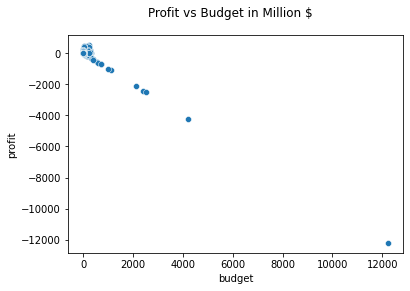

In [95]:
sns.scatterplot(movies.budget, movies.profit)
plt.suptitle('Profit vs Budget in Million $')
plt.show()

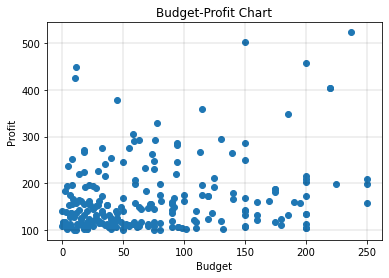

In [96]:
movies=movies[movies.profit>100]
plt.scatter(movies['budget'], movies['profit']) 
plt.xlabel("Budget") #Labelling x
plt.ylabel("Profit") #Labelling y
plt.title("Budget-Profit Chart")
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)  ##adds major gridlines
plt.show()

In [97]:
# Write your code to get the top 10 profiting movies here
top10 = movies.sort_values(by='profit',ascending=False)
top10.head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [98]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(keep='first',inplace=True)

In [99]:
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000,2009.0,7.9,33000,523.505847
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.000,2012.0,8.5,164000,198.130642
8,Joss Whedon,635.0,458.991599,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,1117,English,250.000,2015.0,7.5,118000,208.991599
13,Gore Verbinski,313.0,423.032628,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,1832,English,225.000,2006.0,7.3,5000,198.032628
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.000,2012.0,8.1,123000,403.279547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,John G. Avildsen,141.0,117.235247,Drama|Sport,Sylvester Stallone,Rocky,375240,542,English,0.960,1976.0,8.1,0,116.275247
4557,Jason Reitman,387.0,143.492840,Comedy|Drama|Romance,J.K. Simmons,Juno,414345,881,English,7.500,2007.0,7.5,10000,135.992840
4674,George Lucas,100.0,115.000000,Comedy|Drama|Music,Harrison Ford,American Graffiti,63839,238,English,0.777,1973.0,7.5,0,114.223000
4707,Daniel Myrick,360.0,140.530114,Horror,Heather Donahue,The Blair Witch Project,186786,3400,English,0.060,1999.0,6.4,0,140.470114


In [100]:
# Write code for repeating subtask 2 here
top10 = movies.sort_values(by='profit',ascending=False)
top10.head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061
439,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959,English,78.0,2012.0,7.3,140000,329.999255


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [101]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
IMDb_Top_250=movies[movies['num_voted_users']>25000].sort_values(by='imdb_score',ascending=False).head(250)
IMDb_Top_250

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.0,1972.0,9.2,43000,128.821952
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061
339,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189,English,94.0,2003.0,8.9,16000,283.019252
2051,Irvin Kershner,223.0,290.158751,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode V - The Empire Strikes Back,837759,900,English,18.0,1980.0,8.8,17000,272.158751
270,Peter Jackson,297.0,313.837577,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,5060,English,93.0,2001.0,8.8,21000,220.837577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,Catherine Hardwicke,350.0,191.449475,Drama|Fantasy|Romance,Kristen Stewart,Twilight,348010,1535,English,37.0,2008.0,5.2,19000,154.449475
631,David Slade,293.0,300.523113,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Eclipse,184637,498,English,68.0,2010.0,4.9,29000,232.523113
926,Chris Weitz,299.0,296.623634,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: New Moon,220758,919,English,50.0,2009.0,4.6,13000,246.623634
597,Betty Thomas,107.0,219.613391,Animation|Comedy|Family|Fantasy|Music,Amy Poehler,Alvin and the Chipmunks: The Squeakquel,31649,98,English,75.0,2009.0,4.5,2000,144.613391


In [102]:
IMDb_Top_250['Rank']=IMDb_Top_250['imdb_score'].rank(method='first',ascending=False)
IMDb_Top_250

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.0,1972.0,9.2,43000,128.821952,1.0
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061,2.0
339,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189,English,94.0,2003.0,8.9,16000,283.019252,3.0
2051,Irvin Kershner,223.0,290.158751,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode V - The Empire Strikes Back,837759,900,English,18.0,1980.0,8.8,17000,272.158751,4.0
270,Peter Jackson,297.0,313.837577,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,5060,English,93.0,2001.0,8.8,21000,220.837577,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,Catherine Hardwicke,350.0,191.449475,Drama|Fantasy|Romance,Kristen Stewart,Twilight,348010,1535,English,37.0,2008.0,5.2,19000,154.449475,219.0
631,David Slade,293.0,300.523113,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Eclipse,184637,498,English,68.0,2010.0,4.9,29000,232.523113,220.0
926,Chris Weitz,299.0,296.623634,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: New Moon,220758,919,English,50.0,2009.0,4.6,13000,246.623634,221.0
597,Betty Thomas,107.0,219.613391,Animation|Comedy|Family|Fantasy|Music,Amy Poehler,Alvin and the Chipmunks: The Squeakquel,31649,98,English,75.0,2009.0,4.5,2000,144.613391,222.0


In [103]:
# Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film =IMDb_Top_250[IMDb_Top_250['language']!='English']
Top_Foreign_Lang_Film

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
2605,Ang Lee,287.0,128.067808,Action|Drama|Romance,Chen Chang,"Crouching Tiger, Hidden Dragon",217740,1641,Mandarin,15.0,2000.0,7.9,0,113.067808,60.0


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [104]:
# Write your code for extracting the top 10 directors here
top10director = movies.groupby('director_name').imdb_score.mean().sort_values(ascending=False).head(10)
top10director

director_name
Francis Ford Coppola    9.200000
Irvin Kershner          8.800000
Christopher Nolan       8.766667
Milos Forman            8.700000
Jonathan Demme          8.600000
Peter Jackson           8.575000
Roger Allers            8.500000
Richard Marquand        8.400000
Robert Zemeckis         8.333333
Lee Unkrich             8.300000
Name: imdb_score, dtype: float64

**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [105]:
# Write your code for extracting the first two genres of each movie here
TempGenre=movies.genres.str.split('|',expand=True).iloc[:,0:2]
TempGenre.columns=['genre_1','genre_2']
TempGenre.genre_2.fillna(TempGenre.genre_1,inplace=True)
TempGenre

,genre_1,genre_2
0,Action,Adventure
3,Action,Thriller
8,Action,Adventure
13,Action,Adventure
17,Action,Adventure
...,...,...
4530,Drama,Sport
4557,Comedy,Drama
4674,Comedy,Drama
4707,Horror,Horror


In [106]:
# Write your code for grouping the dataframe here
movies_by_segment = pd.concat([movies,TempGenre],axis=1)
movies_by_segment

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000,2009.0,7.9,33000,523.505847,Action,Adventure
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.000,2012.0,8.5,164000,198.130642,Action,Thriller
8,Joss Whedon,635.0,458.991599,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,1117,English,250.000,2015.0,7.5,118000,208.991599,Action,Adventure
13,Gore Verbinski,313.0,423.032628,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,1832,English,225.000,2006.0,7.3,5000,198.032628,Action,Adventure
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.000,2012.0,8.1,123000,403.279547,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,John G. Avildsen,141.0,117.235247,Drama|Sport,Sylvester Stallone,Rocky,375240,542,English,0.960,1976.0,8.1,0,116.275247,Drama,Sport
4557,Jason Reitman,387.0,143.492840,Comedy|Drama|Romance,J.K. Simmons,Juno,414345,881,English,7.500,2007.0,7.5,10000,135.992840,Comedy,Drama
4674,George Lucas,100.0,115.000000,Comedy|Drama|Music,Harrison Ford,American Graffiti,63839,238,English,0.777,1973.0,7.5,0,114.223000,Comedy,Drama
4707,Daniel Myrick,360.0,140.530114,Horror,Heather Donahue,The Blair Witch Project,186786,3400,English,0.060,1999.0,6.4,0,140.470114,Horror,Horror


In [107]:
# Write your code for getting the 5 most popular combo of genres here
PopGenre =  movies_by_segment.groupby(['genre_1','genre_2']).gross.mean().sort_values(ascending=False).head(5)
PopGenre 

genre_1    genre_2  
Family     Sci-Fi       434.949459
Action     Biography    350.123553
           Animation    336.029560
Adventure  Sci-Fi       326.895313
Action     Adventure    319.038883
Name: gross, dtype: float64

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [108]:
# Write your code for creating three new dataframes here
# Include all movies in which Meryl_Streep is the lead
Meryl_Streep = movies[movies['actor_1_name']=='Meryl Streep']
Meryl_Streep

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit


In [109]:
Leo_Caprio = movies[movies['actor_1_name']=='Leonardo DiCaprio'] # Include all movies in which Leo_Caprio is the lead
Leo_Caprio

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
97,Christopher Nolan,642.0,292.568851,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803,English,160.0,2010.0,8.8,175000,132.568851
911,Steven Spielberg,194.0,164.435221,Biography|Crime|Drama,Leonardo DiCaprio,Catch Me If You Can,525801,667,English,52.0,2002.0,8.0,15000,112.435221


In [110]:
Brad_Pitt = movies[movies['actor_1_name']=='Brad Pitt']# Include all movies in which Brad_Pitt is the lead
Brad_Pitt

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit


In [111]:
# Write your code for combining the three dataframes here
combined=Meryl_Streep.append([Leo_Caprio,Brad_Pitt])
combined

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
97,Christopher Nolan,642.0,292.568851,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803,English,160.0,2010.0,8.8,175000,132.568851
911,Steven Spielberg,194.0,164.435221,Biography|Crime|Drama,Leonardo DiCaprio,Catch Me If You Can,525801,667,English,52.0,2002.0,8.0,15000,112.435221


In [112]:
# Write your code for grouping the combined dataframe here
Actor_name = combined.groupby('actor_1_name')
Actor_name

In [113]:
combined.groupby('actor_1_name').num_critic_for_reviews.mean().sort_values(ascending=False)

actor_1_name
Leonardo DiCaprio    383.666667
Name: num_critic_for_reviews, dtype: float64

In [114]:
combined.groupby('actor_1_name').num_user_for_reviews.mean().sort_values(ascending=False)

actor_1_name
Leonardo DiCaprio    8.427601e+09
Name: num_user_for_reviews, dtype: float64

In [115]:
# Write the code for finding the mean of critic reviews and audience reviews here
combined.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean()

,num_critic_for_reviews
actor_1_name,
Leonardo DiCaprio,383.666667


**Checkpoint 6:** `Leonardo` has aced both the lists!

In [116]:
# Write the code for calculating decade here
movies['decade']=movies['title_year'].apply(lambda x: (x//10) *10).astype(np.int64)  #astype(np.int64) to remove .0
movies['decade']=movies['decade'].astype(str)+'s'    #astype(str)+'s' to add s to decade
movies=movies.sort_values(['decade'])
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,decade
3970,Victor Fleming,157.0,198.655278,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,706,English,3.977,1939.0,8.2,16000,194.678278,1930s
4449,William Cottrell,145.0,184.925485,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,204,English,2.000,1937.0,7.7,0,182.925485,1930s
3026,David Lean,89.0,111.722000,Drama|Romance|War,Julie Christie,Doctor Zhivago,55816,255,English,11.000,1965.0,8.0,7000,100.722000,1960s
3359,Robert Wise,119.0,163.214286,Biography|Drama|Family|Musical|Romance,Eleanor Parker,The Sound of Music,148172,406,English,8.200,1965.0,8.0,15000,155.014286,1960s
2916,William Friedkin,304.0,204.565000,Horror,Ellen Burstyn,The Exorcist,284252,1058,English,8.000,1973.0,8.0,18000,196.565000,1970s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,Elizabeth Banks,221.0,183.436380,Comedy|Music,Anna Kendrick,Pitch Perfect 2,97697,185,English,29.000,2015.0,6.5,40000,154.436380,2010s
2607,Tom Hooper,479.0,138.795342,Biography|Drama|History|Romance,Colin Firth,The King's Speech,503631,636,English,15.000,2010.0,8.0,64000,123.795342,2010s
944,Sean Anders,145.0,150.315155,Comedy|Family,Will Ferrell,Daddy's Home,54010,130,English,50.000,2015.0,6.1,13000,100.315155,2010s
939,Phil Lord,330.0,191.616238,Action|Comedy|Crime,Channing Tatum,22 Jump Street,258186,322,English,50.000,2014.0,7.1,24000,141.616238,2010s


In [117]:
# Write your code for creating the data frame df_by_decade here 
df_by_decade=movies.groupby('decade')
df_by_decade['num_voted_users'].sum()
#Convert to Dafaframe
df_by_decade=pd.DataFrame(df_by_decade['num_voted_users'].sum())
df_by_decade

,num_voted_users
decade,
1930s,348688
1960s,203988
1970s,4553086
1980s,6048476
1990s,16780580
2000s,34146020
2010s,22080527


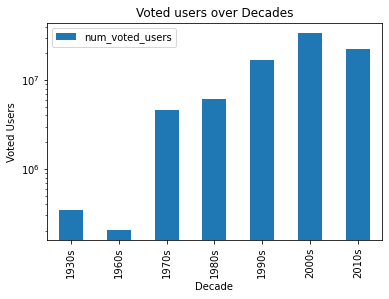

In [118]:
# Write your code for plotting number of voted users vs decade
df_by_decade.plot.bar()  
plt.xlabel("Decade")
plt.ylabel("Voted Users")
plt.title("Voted users over Decades")
plt.yscale('log')  #Changing y scale
plt.show()